<a href="https://colab.research.google.com/github/IvanKatorgin/Miscellaneous/blob/main/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BC%D0%B5%D1%80%D1%8B_%D1%81%D0%B2%D1%8F%D0%B7%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('FPS_lecture_df_0_height-weignt.xlsx')
df.head()

,ID,Gender,Height,Weight
0,10001,Male,174.782639,78.652188
1,10002,Female,165.183571,74.332607
2,10003,Male,181.542046,81.693920
3,10004,Female,167.845912,75.530661
4,10005,Female,160.475255,72.213865


In [ ]:
# формулирование выборок
df_1=df[df['Gender']=='Male']
df_2=df[df['Gender']=='Female']
print('Выборки имеют одинаковую длину: ', len(df_1)==len(df_2))

Выборки имеют одинаковую длину:  True


In [ ]:
# описательные статистики мужчин
df_1.describe()

,ID,Height,Weight
count,1000.000000,1000.000000,1000.000000
mean,11002.281000,175.655759,79.045091
std,580.298598,7.331049,3.298972
min,10001.000000,153.429654,69.043344
25%,10498.000000,170.757381,76.840822
50%,11000.500000,175.575025,79.008761
75%,11506.250000,180.612933,81.275820
max,11998.000000,195.283831,87.877724


In [ ]:
# описательные статистики женщин
df_2.describe()

,ID,Height,Weight
count,1000.000000,1000.000000,1000.000000
mean,10998.719000,161.420314,72.639141
std,574.961756,6.834302,3.075436
min,10002.000000,138.387486,62.274369
25%,10503.750000,156.704763,70.517143
50%,11000.500000,161.494158,72.672371
75%,11496.500000,165.859545,74.636795
max,12000.000000,186.460992,83.907447


<ipython-input-7-0435ac6286a5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Weight'], 50)
<ipython-input-7-0435ac6286a5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['Weight'], 50)


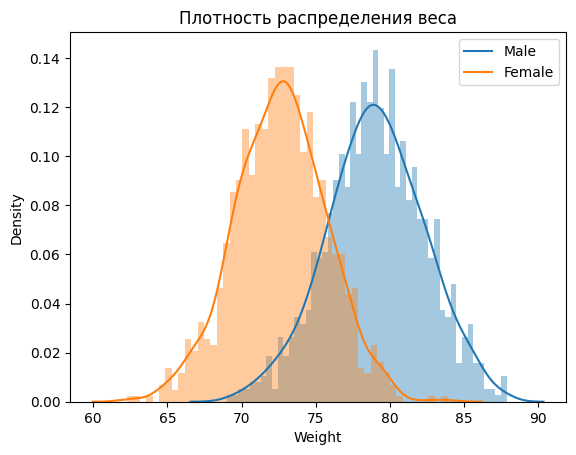

In [ ]:
# визуализация перечня интервалов веса мужчин и женщин
sns.distplot(df_1['Weight'], 50)
sns.distplot(df_2['Weight'], 50)
plt.title('Плотность распределения веса')
plt.legend(['Male', 'Female'])
plt.show()

In [ ]:
# функция бинарной классификации по признаку пола
def func_bin_gender(row):
  if row['Gender']=='Male':
    return 1
  elif row['Gender']=='Female':
    return 0

In [ ]:
# добавление столбца бинарной классификации пола
df['Gender(bin)']=df.apply(func_bin_gender, axis=1)
df

,ID,Gender,Height,Weight,Gender(bin)
0,10001,Male,174.782639,78.652188,1
1,10002,Female,165.183571,74.332607,0
2,10003,Male,181.542046,81.693920,1
3,10004,Female,167.845912,75.530661,0
4,10005,Female,160.475255,72.213865,0
...,...,...,...,...,...
1995,11996,Male,184.224224,82.900901,1
1996,11997,Male,180.164315,81.073942,1
1997,11998,Male,173.442407,78.049083,1
1998,11999,Female,164.588728,74.064928,0


In [ ]:
# корреляция роста к весу
df['Height'].corr(df['Weight'])

1.0

In [ ]:
# корреляция пола к росту
df['Gender(bin)'].corr(df['Height'])

0.7088094753460076

In [ ]:
# корреляция пола к весу
df['Gender(bin)'].corr(df['Weight'])

0.7088094753460076

In [ ]:
# матрица корреляции средствами pandas
df.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-16-c1582c79c505>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,ID,Height,Weight,Gender(bin)
ID,1.000000,0.000944,0.000944,0.003085
Height,0.000944,1.000000,1.000000,0.708809
Weight,0.000944,1.000000,1.000000,0.708809
Gender(bin),0.003085,0.708809,0.708809,1.000000


<ipython-input-17-2f9cbbd13e2d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')


<Axes: >

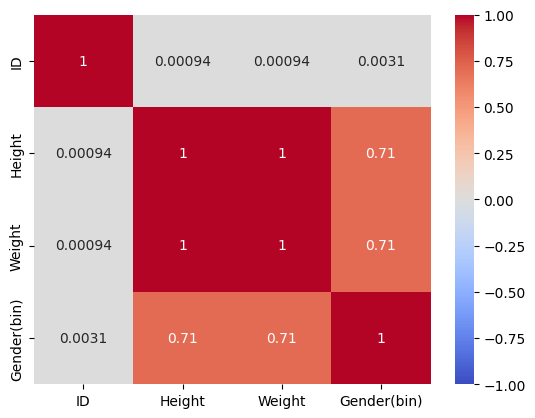

In [ ]:
# матрица корреляции средствами визуализации seaborn (тепловая матрица)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

Построение линейной регрессии

In [ ]:
# формирование выборок роста и веса для мужчин
x=df_1[['Height']]
y=df_1[['Weight']]

In [ ]:
from sklearn.linear_model import LinearRegression # подключение модуля линейной регресси
regressor=LinearRegression()                      # инициализация линейной регресси
regressor.fit(x,y)                                # обучение линейной регрессии

LinearRegression()

In [ ]:
# коэффициент прямой
a=regressor.intercept_
a

array([-1.42108547e-14])

In [ ]:
# коэффициент наклона прямой
b=regressor.coef_
b

array([[0.45]])

In [ ]:
Height_pred=170                     # значение роста для получения прогноза веса
regressor.predict([[Height_pred]])  # получене прогноза линейной регрессии

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[76.5]])

In [ ]:
# получение прогноза "в лоб" по уравнению прямой регрессии a+bx
a+b*Height_pred

array([[76.5]])

Аналогично построение регрессии для женщин

In [ ]:
# формирование выборок роста и веса для мужчин
x=df_2[['Height']]
y=df_2[['Weight']]

from sklearn.linear_model import LinearRegression # подключение модуля линейной регресси
regressor=LinearRegression()                      # инициализация линейной регресси
regressor.fit(x,y)                                # обучение линейной регрессии

# коэффициент прямой
a=regressor.intercept_
a
# коэффициент наклона прямой
b=regressor.coef_
b

Height_pred=160                                   # значение роста для получения прогноза веса
regressor.predict([[Height_pred]])                # получене прогноза линейной регрессии

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[72.]])

In [ ]:
# получение прогноза "в лоб" по уравнению прямой регрессии a+bx
a+b*Height_pred

array([[72.]])